In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading data


In [158]:
df=pd.read_csv('IMDB_Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## value count 

In [159]:
label_counts=df['sentiment'].value_counts()

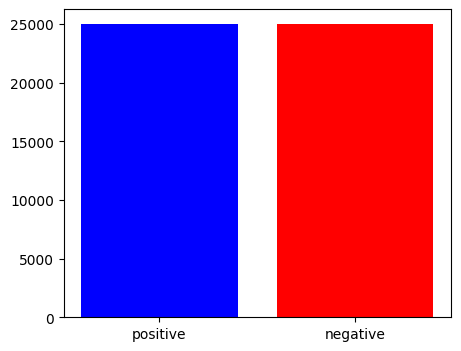

In [160]:
plt.figure(figsize=(5,4))
plt.bar(label_counts.index,label_counts.values,color=['blue','red'])
plt.show()

not imballanced data

## missing values

In [161]:
missing_values=df.isnull().sum()
missing_values

review       0
sentiment    0
dtype: int64

In [162]:
blanks=[]
for i,comment,label in df.itertuples():
    if comment.isspace():
        blank.append(i)

print(len(blanks))

0


## cleaning data

In [163]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [164]:
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
sw=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/parsamhb82/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/parsamhb82/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [166]:
n=0
for i in sw:
    n=n+1
print(n)

198


In [167]:
def preprocess_text(messy_string):
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])
    return cleaned 

In [168]:
test='hello my name is vala and im happy to be here'
preprocess_text(test)

'hello name vala im happy'

In [169]:
df['review'].apply(preprocess_text)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [170]:
print(df.head(5))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [171]:
df['review']=df['review'].str.lower()

In [172]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [173]:
import re 
import string 
custom_stopwords = set("""
x y year 1990 2005 21 233 say will your yours yourself yourselves you yond yonder yon ye yet z zillion j u umpteen usually us username uponed upons uponing upon ups upping upped up unto until unless unlike unliker unlikest under underneath use used usedest r rath rather rathest rathe re relate related relatively regarding really res respecting respectively q quite que qua n neither neaths neath nethe nethermost necessary necessariest necessarier never nevertheless nigh nighest nigher nine noone nobody nobodies nowhere nowheres no noes nor nos no-one none not notwithstanding nothings nothing nathless natheless t ten tills till tilled tilling to towards toward towardest towarder together too thy thyself thus than that those thou though thous thouses thoroughest thorougher thorough thoroughly thru thruer thruest thro through throughout throughest througher thine this thises they thee the then thence thenest thener them themselves these therer there thereby therest thereafter therein thereupon therefore their theirs thing things three two o oh owt owning owned own owns others other otherwise otherwisest otherwiser of often oftener oftenest off offs offest one ought oughts our ours ourselves ourself out outest outed outwith outs outside over overallest overaller overalls overall overs or orer orest on oneself onest ons onto a atween at athwart atop afore afterward afterwards after afterest afterer ain an any anything anybody anyone anyhow anywhere anent anear and andor another around ares are aest aer against again accordingly abaft abafter abaftest abovest above abover abouter aboutest about aid amidst amid among amongst apartest aparter apart appeared appears appear appearing appropriating appropriate appropriatest appropriates appropriater appropriated already always also along alongside although almost all allest aller allyou alls albeit awfully as aside asides aslant ases astrider astride astridest astraddlest astraddler astraddle availablest availabler available aughts aught vs v variousest variouser various via vis-a-vis vis-a-viser vis-a-visest viz very veriest verier versus k g go gone good got gotta gotten get gets getting b by byandby by-and-by bist both but buts be beyond because became becomes become becoming becomings becominger becomingest behind behinds before beforehand beforehandest beforehander bettered betters better bettering betwixt between beneath been below besides beside m my myself mucher muchest much must musts musths musth main make mayest many mauger maugre me meanwhiles meanwhile mostly most moreover more might mights midst midsts h huh humph he hers herself her hereby herein hereafters hereafter hereupon hence hadst had having haves have has hast hardly hae hath him himself hither hitherest hitherer his how-do-you-do however how howbeit howdoyoudo hoos hoo w woulded woulding would woulds was wast we wert were with withal without within why what whatever whateverer whateverest whatsoeverer whatsoeverest whatsoever whence whencesoever whenever whensoever when whenas whether wheen whereto whereupon wherever whereon whereof where whereby wherewithal wherewith whereinto wherein whereafter whereas wheresoever wherefrom which whichever whichsoever whilst while whiles whithersoever whither whoever whosoever whoso whose whomever s syne syn shalling shall shalled shalls shoulding should shoulded shoulds she sayyid sayid said saider saidest same samest sames samer saved sans sanses sanserifs sanserif so soer soest sobeit someone somebody somehow some somewhere somewhat something sometimest sometimes sometimer sometime several severaler severalest serious seriousest seriouser senza send sent seem seems seemed seemingest seeminger seemings seven summat sups sup supping supped such since sine sines sith six stop stopped p plaintiff plenty plenties please pleased pleases per perhaps particulars particularly particular particularest particularer pro providing provides provided provide probably l layabout layabouts latter latterest latterer latterly latters lots lotting lotted lot lest less ie ifs if i info information itself its it is idem idemer idemest immediate immediately immediatest immediater in inwards inwardest inwarder inward inwardest inwarder inwards inasmuch into instead insofar indicates indicated indicate indicating indeed inc f fact facts fs figupon figupons figuponing figuponed few fewer fewest frae from failing failings five furthers furtherer furthered furtherest further furthering furthermore fourscore followthrough for forwhy fornenst formerly former formerer formerest formers forbye forby fore forever forer fores four d ddays dday do doing doings doe does doth downwarder downwardest downward downwards downs done doner dones donest dos dost did differentest differenter different describing describe describes described despiting despites despited despite during c cum circa chez cer certain certainest certainer cest canst cannot cant cants canting cantest canted co could couldst comeon comeons come-ons come-on concerning concerninger concerningest consequently considering e eg eight either even evens evenser evensest evened evenest ever everyone everything everybody everywhere every ere each et etc else elsewhere else ex excepted excepts except excepting exes enough
""".split())
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text) # Remove all HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation (., "' etc.) 
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces 
    text = text.lower()
    text = text.strip()
    tokens = text.split()
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)
    returned_text = [token for token in tokens if token.lower() not in custom_stopwords and len(token) >= 3]
    return " ".join(returned_text)
    
df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,reviewers mentioned watching just episode youl...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


## split data 

In [174]:
X=df['review']
y=df['sentiment'].replace({"positive": 1, "negative": 0}).astype(int)

/tmp/ipykernel_7842/3495392463.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=df['sentiment'].replace({"positive": 1, "negative": 0}).astype(int)


In [175]:
from sklearn.model_selection import train_test_split 
X_train, X_temp, y_train,y_temp =train_test_split(X,y,test_size=0.3,random_state=42)
X_val, X_test, y_val,y_test =train_test_split(X_temp,y_temp,test_size=1/3,random_state=42)

In [176]:
print('  train: ', X_train.shape[0],'  validation: ', X_val.shape[0],'  test: ', X_test.shape[0])

  train:  35000   validation:  10000   test:  5000


In [133]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

# TF-IDF

## Training model 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv=CountVectorizer()
tfidf= TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
X_val_tfidf=tfidf.transform(X_val)


In [28]:
X_train_tfidf

<35000x135688 sparse matrix of type '<class 'numpy.float64'>'
	with 4756417 stored elements in Compressed Sparse Row format>

In [25]:
X_val_tfidf.shape

(10000, 135688)

## logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix 
y_pred=clf.predict(X_val_tfidf)
report=classification_report(y_val,y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4918
    positive       0.90      0.91      0.90      5082

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



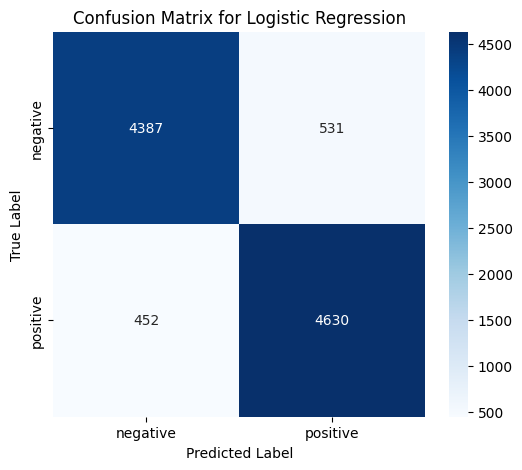

In [29]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


# count vectorize

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#cv=CountVectorizer()
#tfidf= TfidfVectorizer()
#X=cv.fit_transform(df['review'])
#y=df['sentiment']

In [26]:
#from sklearn.model_selection import train_test_split 
#X_train, X_temp, y_train,y_temp =train_test_split(X,y,test_size=0.3,random_state=42)
#X_val, X_test, y_val,y_test =train_test_split(X_temp,y_temp,test_size=1/3,random_state=42)

In [27]:
#from sklearn.linear_model import LogisticRegression 
#clf=LogisticRegression(max_iter=1000)
#clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
#from sklearn.metrics import classification_report,confusion_matrix 
#y_pred=clf.predict(X_val)
#report=classification_report(y_val,y_pred)
#print(report)

              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4918
    positive       0.89      0.90      0.90      5082

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## SVM 

Training SVM...
[LibSVM]Classification Report for SVM:
               precision    recall  f1-score   support

    negative       0.91      0.90      0.90      4918
    positive       0.90      0.92      0.91      5082

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



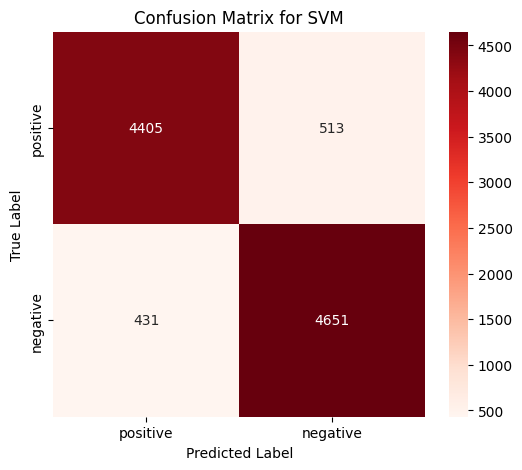

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assume X_train, X_val, y_train, y_val are predefined

# Train and evaluate SVM
print("Training SVM...")
svm_model = SVC(kernel='rbf', cache_size=700, verbose=True)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)
report_svm = classification_report(y_val, y_pred_svm)
print("Classification Report for SVM:\n", report_svm)

cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")



## KNN 

Classification Report for KNN:
               precision    recall  f1-score   support

    negative       0.79      0.69      0.74      4918
    positive       0.73      0.82      0.77      5082

    accuracy                           0.76     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.76      0.75     10000



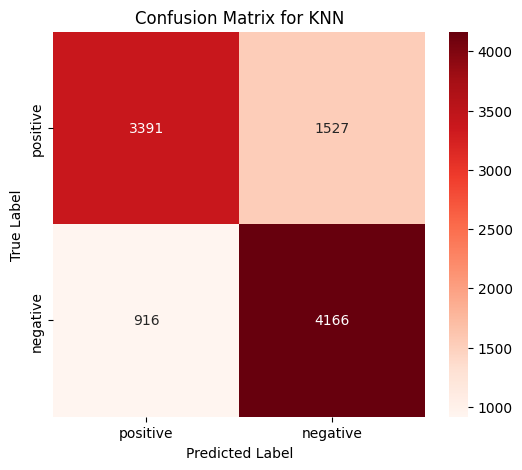

Progress: 100% completed



In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_tfidf, y_train)

y_pred_knn = knn_model.predict(X_val_tfidf)
report_knn = classification_report(y_val, y_pred_knn)
print("Classification Report for KNN:\n", report_knn)

cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()
print("Progress: 100% completed\n")


In [42]:
y_train

38094   NaN
40624   NaN
49425   NaN
35734   NaN
41708   NaN
         ..
11284   NaN
44732   NaN
38158   NaN
860     NaN
15795   NaN
Name: sentiment, Length: 35000, dtype: float64

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single text
y = y.map({"positive": 1, "negative": 0})
positive_text = " ".join(X[y == 1].astype(str))
print(f"Length of positive_text: {len(positive_text)}")
print(f"Sample text: {positive_text[:500]}")  # Print a small part of the text



Length of positive_text: 31582723
Sample text: one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to 


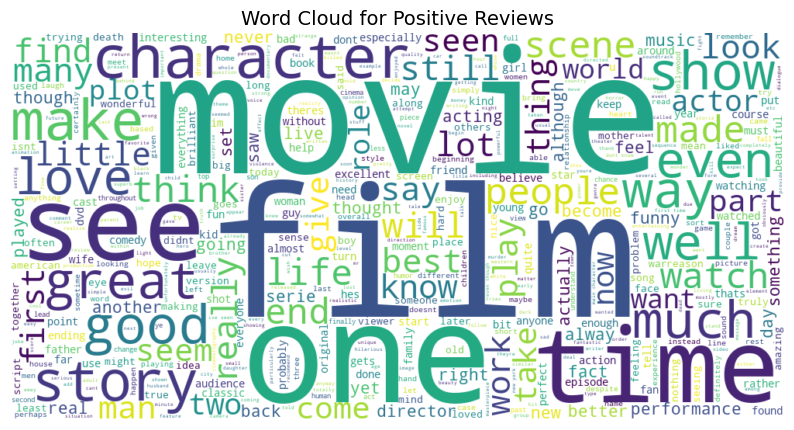

In [44]:
# Generate Word Cloud
plt.figure(figsize=(10, 6))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, background_color="white")
positive_words = WC.generate(positive_text)

# Display
plt.imshow(positive_words, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews", fontsize=14)
plt.show()


In [177]:
import torch
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [178]:
def convert_to_dataset(df):
    return Dataset.from_pandas(df)

In [179]:
train_df = pd.DataFrame({'review': X_train, 'label': y_train})
val_df = pd.DataFrame({'review': X_val, 'label': y_val})

In [180]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["review"], padding="max_length", truncation=True, max_length=256)

In [181]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

In [182]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [183]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [184]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
    predictions = np.argmax(pred.predictions, axis=1)
    return {"accuracy": accuracy_score(pred.label_ids, predictions)}


In [185]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [186]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [187]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.312900,0.272162,0.899500
2,0.333200,0.376762,0.902300
3,0.118800,0.455851,0.904400


TrainOutput(global_step=13125, training_loss=0.2354784386008978, metrics={'train_runtime': 9209.7913, 'train_samples_per_second': 11.401, 'train_steps_per_second': 1.425, 'total_flos': 6954538429440000.0, 'train_loss': 0.2354784386008978, 'epoch': 3.0})

In [188]:
eval_results = trainer.evaluate()
print(f"Validation Accuracy: {eval_results['eval_accuracy']:.4f}")

Validation Accuracy: 0.9044
